# **SYSTEM RECOMMENDATION : MOBILE RECOMMENDATION SYSTEM**
## Nama : Rafly Ashraffi Rachmat
## Email : raflypriyantoro@gmail.com
## Sumber Dataset :
Dataset diperoleh dari kaggle dengan judul **Mobile Recommendation System Dataset** (https://www.kaggle.com/datasets/gyanprakashkushwaha/mobile-recommendation-system-dataset) dengan jumlah dataset 2546 data.

# **Proyek Overview**

Di era digital saat ini, konsumen memiliki begitu banyak pilihan dalam membeli smartphone, yang hadir dengan variasi spesifikasi teknis seperti kapasitas RAM, ukuran kamera, daya baterai, sistem operasi, dan kisaran harga yang sangat luas. Banyaknya pilihan ini seringkali membuat pengguna kesulitan dalam menentukan produk yang paling sesuai dengan kebutuhan dan preferensinya.

Proyek ini bertujuan untuk membangun sistem rekomendasi smartphone berbasis data yang dapat membantu pengguna dalam memilih smartphone terbaik berdasarkan spesifikasi dan ulasan pengguna. Dataset yang digunakan memuat informasi penting seperti nama produk, rating pengguna, harga, tautan gambar produk, serta deskripsi teknis (corpus) yang mencakup RAM, penyimpanan internal, baterai, kamera, dan sistem operasi.

# 💼 **Business Understanding**

## 🔍 **Problem Statements**
1. Bagaimana persebaran penggunaan smartphone berdasarkan nama smartphone dan rentang harga yang paling diminati pengguna?
2. Bagaimana performa nama dan model smartphone berdasarkan fitur teknis seperti storage/ram, OS/prosesor, kamera, display, jaringan, dan baterai dibandingkan dengan rating pengguna?
3. Bagaimana spesifikasi teknis smartphone (corpus) mempengaruhi dalam menentukan rating smartphone di berbagai segmen harga?
4. Bagaimana cara membuat sistem rekomendasi smartphone yang optimal dan dapat diimplementasikan secara efektif?

## 🎯 **Goals**
1. Mengetahui persebaran dan popularitas smartphone berdasarkan merek dan segmen harga yang paling diminati pengguna.
2. Menganalisis performa smartphone dengan memvisualisasikan hubungan antara fitur teknis dan rating pengguna.
3. Mengevaluasi pengaruh spesifikasi teknis smartphone terhadap rating di berbagai kategori harga menggunakan visualisasi seperti heatmap dan scatterplot.
4. Mengembangkan sistem rekomendasi smartphone menggunakan pendekatan content-based filtering serta mengevaluasi performanya dengan metrik akurasi yang sesuai.


## 🛠️ **Solution Approach**
Untuk mencapai tujuan di atas, pendekatan berikut akan digunakan dalam analisis dan pengembangan sistem rekomendasi smartphone:
1. Mengimplementasikan Exploratory Data Analysis (EDA) untuk analisis dan visualisasi data.
2. Mengimplementasikan content-based filtering approach menggunakan algoritma cosine similarity untuk merekomendasikan smartphone berdasarkan kesamaan fitur teknis dan preferensi pengguna.



# **Data Understanding**

## **Import Library**

Import Semua Library yang diperlukan

In [11]:
import os
import shutil
import zipfile
import re
from IPython.display import display
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

In [12]:
# Gantilah path ini dengan path absolut atau relatif dari file ZIP di sistem lokalmu
zip_path = "archive_mobile.zip"
extract_to = "dataset_mobile"

# Membuka dan mengekstrak ZIP
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_to)

# Tampilkan semua file di folder hasil ekstraksi untuk memastikan nama file
print("File yang diekstrak:")
print(os.listdir(extract_to))

# Load dataset
csv_path = os.path.join(extract_to, "mobile_recommendation_system_dataset.csv")
data = pd.read_csv(csv_path)

# Tampilkan 5 baris pertama
data.head()


File yang diekstrak:
['mobile_recommendation_system_dataset.csv']


,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


### **Deskripsi Variabel**

Berikut adalah arti dari variabel-variabel dataset diatas

| **Nama Variabel** | **Tipe Data**  | **Deskripsi**                                                                             |
| ----------------- | -------------- | ----------------------------------------------------------------------------------------- |
| `name`            | String         | Nama lengkap smartphone beserta varian warna dan kapasitas penyimpanan.                   |
| `ratings`         | Float          | Nilai rating pengguna terhadap smartphone, biasanya dalam skala 1 hingga 5.               |
| `price`           | Integer/String | Harga smartphone. Perlu dibersihkan jika menggunakan simbol mata uang (misalnya `₹`).     |
| `imgURL`          | String (URL)   | Tautan gambar produk dari situs e-commerce.                                               |
| `corpus`          | String         | Deskripsi spesifikasi teknis (storage, RAM, OS, prosesor, kamera, dll) dalam bentuk teks. |

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


In [17]:
# Menampilkan jumlah baris dan kolom pada data
total_row, total_column = data.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")

Total of rows: 2546
Total of column: 5


Dapat dilihat bahwa data yang digunakan adalah sebanyak 2546 data dengan 5 fitur dengan terdapat 1 variabel bertipe `float64`, 4 variabel bertipe `object`.

### **Statistik Deskripsi dari Data**

In [20]:
data.describe()

,ratings
count,2546.000000
mean,4.295797
std,0.214691
min,2.900000
25%,4.200000
50%,4.300000
75%,4.400000
max,5.000000


Tabel di atas memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi (mengukur seberapa tersebar data).
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama, yaitu nilai di bawah 25% data berada.
- 50% adalah kuartil kedua, juga disebut median (nilai tengah data).
- 75% adalah kuartil ketiga, yaitu nilai di bawah 75% data berada.
- Max adalah nilai maksimum

Penjelasan:

Dari tabel Data ratings menunjukkan distribusi yang cukup sempit dan condong ke arah nilai tinggi, yang mengindikasikan bahwa mayoritas pengguna memberikan penilaian positif terhadap item yang ada. Hal ini bisa menunjukkan kualitas produk/jasa yang baik atau bisa juga bias penilaian (rating bias).

In [23]:
# Membersihkan kolom 'price' dari simbol ₹ dan tanda koma, lalu mengubah ke float
data['price'] = data['price'].str.replace('₹', '', regex=False)
data['price'] = data['price'].str.replace(',', '', regex=False)
data['price'] = data['price'].astype(float)

# Menampilkan hasil pembersihan pada 5 data teratas
data['price'].head()


0    23999.0
1    20999.0
2    13149.0
3    21999.0
4     3537.0
Name: price, dtype: float64

Dari hasil diatas menunjukan bahwa kolom price dengan simbol rupe dan koma dihapus dan mengonversi menjadi float.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   float64
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(2), object(3)
memory usage: 99.6+ KB


In [26]:
# Fungsi ekstraksi storage dan RAM
def extract_storage_ram(text):
    if isinstance(text, str):
        pattern = r'(\d+\s?GB\s?(RAM|Storage|ROM|internal|memory).*)'
        match = re.search(pattern, text, flags=re.IGNORECASE)
        return match.group(1) if match else None

# Fungsi ekstraksi OS dan processor
def extract_os_processor(text):
    if isinstance(text, str):
        pattern = r'(Android|iOS|Snapdragon|MediaTek|Exynos|Processor.*?)(,|\.|\n|$)'
        match = re.search(pattern, text, flags=re.IGNORECASE)
        return match.group(1) if match else None

# Fungsi ekstraksi kamera
def extract_camera(text):
    if isinstance(text, str):
        pattern = r'(\d{1,3}\s?MP(?:\s?(?:rear|front|triple|dual)?\s?camera)?)'
        match = re.search(pattern, text, flags=re.IGNORECASE)
        return match.group(1) if match else None

# Fungsi ekstraksi display
def extract_display(text):
    if isinstance(text, str):
        pattern = r'(\d+\.?\d*[-\s]?(inch|inches|\"|\sdisplay).*)'
        match = re.search(pattern, text, flags=re.IGNORECASE)
        return match.group(1) if match else None

# Fungsi ekstraksi jaringan
def extract_network(text):
    if isinstance(text, str):
        pattern = r'\b(5G|4G|3G|Dual SIM)\b'
        match = re.search(pattern, text, flags=re.IGNORECASE)
        return match.group(1) if match else None

# Fungsi ekstraksi kapasitas baterai
def extract_battery(text):
    if isinstance(text, str):
        pattern = r'Capacity\s*(\d{3,5})'
        match = re.search(pattern, text, flags=re.IGNORECASE)
        return f"{match.group(1)} mAh" if match else None

# Terapkan fungsi-fungsi ke kolom 'corpus'
data['storage_ram']  = data['corpus'].apply(extract_storage_ram)
data['os_processor'] = data['corpus'].apply(extract_os_processor)
data['camera']       = data['corpus'].apply(extract_camera)
data['display']      = data['corpus'].apply(extract_display)
data['network']      = data['corpus'].apply(extract_network)
data['battery']      = data['corpus'].apply(extract_battery)

# Tampilkan hasil dalam bentuk tabel
display(data[['name', 'storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery']].head(5))


,name,storage_ram,os_processor,camera,display,network,battery
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",128 GBRAM6 SystemAndroid 12Processor TypeMedi...,Processor TypeMediatek Dimensity 1080Processor...,50MP,5000 Display Size16.94 cm (6.67 inch)Resolutio...,5G,5000 mAh
1,"OPPO F11 Pro (Aurora Green, 128 GB)",128 GBRAM6 GBExpandable Storage256GB SystemAn...,Processor TypeMediaTek Helio P70 Octa Core 2,48MP,4000 Display Size16.51 cm (6.5 inch)Resolution...,3G,4000 mAh
2,"REDMI Note 11 (Starburst White, 64 GB)",64 GBRAM4 SystemAndroid 11Processor Speed2.4 ...,Processor Speed2,50MP,5000 Display Size16.33 cm (6.43 inch)Resolutio...,4G,5000 mAh
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",256 GBRAM12 SystemAndroid Q 11Processor TypeQ...,Processor TypeQualcomm Snapdragon Octa Core 75...,64MP,4500 Display Size16.33 cm (6.43 inch)Resolutio...,5G,4500 mAh
4,"APPLE iPhone 13 mini (Blue, 128 GB)",None,Processor TypeA15 Bionic Chip 12MP 12MP 12MP 6...,12MP,5.4 inch)Resolution2340 x 1080 PixelsResolutio...,5G,None


Agar lebih mudah mengerti dataset maka kolom corpus dipisah menjadi 6 kolom yang terdiri dari storage_ram, os_processor, camera, display, network, dan battery tujuannya agar mudah mengecek apakah terjadi missing value, duplikasi, dan memudahkan visualisasi.

In [28]:
# Menampilkan data duplikat
data[data.duplicated]

,name,ratings,price,imgURL,corpus,storage_ram,os_processor,camera,display,network,battery
1696,"OPPO Reno10 5G (Ice Blue, 256 GB)",4.2,32537.0,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM8 SystemAndroid 13Processor T...,256 GBRAM8 SystemAndroid 13Processor TypeDime...,Processor TypeDimensity 7050Processor Speed2,64MP,5000 Display Size17.02 cm (6.7 inch)Resolution...,5G,5000 mAh


In [29]:
data = data.drop_duplicates()

In [30]:
# Cek jumlah data sebelum menghapus duplikat
print("Jumlah data sebelum menghapus duplikat:", data.shape[0])

# Cek apakah ada data duplikat
duplicates = data[data.duplicated()]
print(f"Jumlah baris duplikat: {duplicates.shape[0]}")

Jumlah data sebelum menghapus duplikat: 2545
Jumlah baris duplikat: 0


Dari hasil diatas terlihat bahwa ada satu data yang terduplikasi tapi sudah diatasi.

In [32]:
# Mengecek missing velue
pd.DataFrame({'Nilai yang Kosong':data.isnull().sum()})

,Nilai yang Kosong
name,0
ratings,0
price,0
imgURL,0
corpus,12
storage_ram,426
os_processor,77
camera,12
display,12
network,128


Dari hasil diatas diketahui bahwa terdapat missing velue di 7 kolom yaitu corpus, storage_ram, os_processor, camera, display, network, dan battery.saya uraikan corpus untuk menangani jika terjadi data missing value dri tiap kriteria yang ada di corpus.

In [34]:
data = data.dropna()

Kode diatas untuk menghapus semua baris dalam DataFrame data yang mengandung nilai kosong (NaN).

In [36]:
# Menangani missing value
pd.DataFrame({'Nilai yang Kosong':data.isnull().sum()})

,Nilai yang Kosong
name,0
ratings,0
price,0
imgURL,0
corpus,0
storage_ram,0
os_processor,0
camera,0
display,0
network,0


Dari hasil diatas terlihat bahwa sudah tidak ada missing value karena sudah ditangani.

In [38]:
data.shape

(1970, 11)

# **Exploratory Data Analysis (EDA)**

### Persebaran penggunaan smartphone berdasarkan nama smartphone dan rentang harga

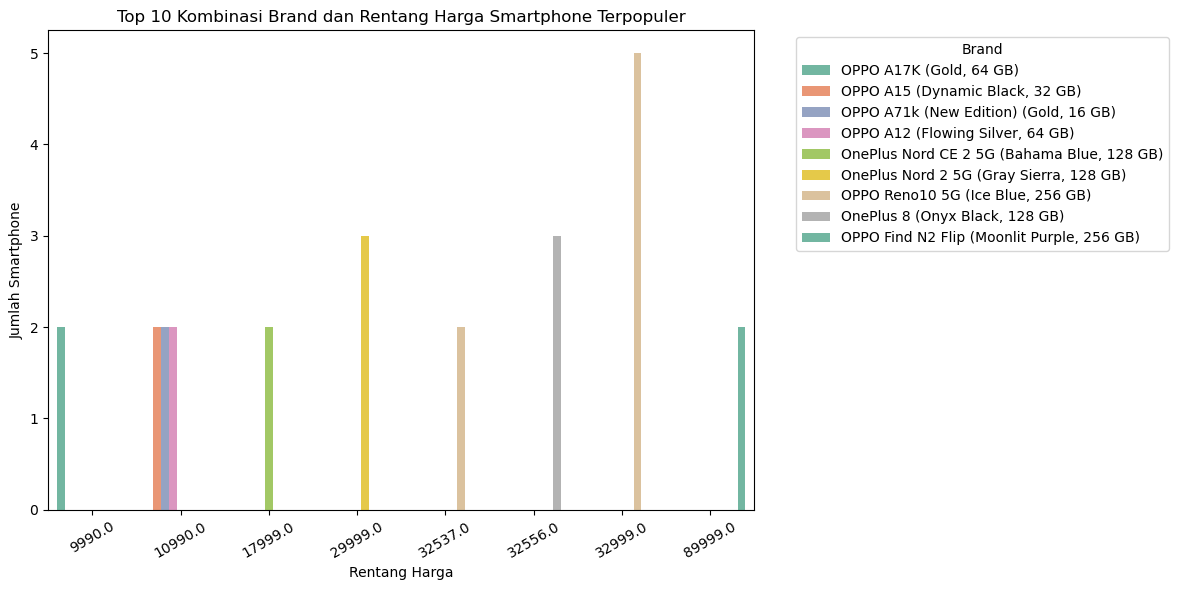

In [41]:
# Hitung kombinasi brand dan rentang harga terbanyak
top_combinations = (
    data
    .groupby(['name', 'price'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(10)
)

# Filter data berdasarkan kombinasi top 10 tersebut
filtered_data = data[data[['name', 'price']].apply(tuple, axis=1).isin(
    top_combinations[['name', 'price']].apply(tuple, axis=1))
]

# Visualisasi
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, x='price', hue='name', palette='Set2')
plt.title('Top 10 Kombinasi Brand dan Rentang Harga Smartphone Terpopuler')
plt.xlabel('Rentang Harga')
plt.ylabel('Jumlah Smartphone')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Kesimpulan:
- Brand OPPO dan OnePlus mendominasi kombinasi brand dan harga terpopuler.
- Harga sekitar Rp30.000 – Rp33.000 menjadi rentang paling banyak muncul dalam kombinasi populer, menandakan kemungkinan ini adalah sweet spot harga yang menarik bagi konsumen.
- Produk dengan kapasitas penyimpanan besar (128–256 GB) tampaknya lebih populer, menunjukkan adanya preferensi konsumen terhadap spesifikasi tinggi di harga menengah.
- Model flagship seperti OPPO Find N2 Flip juga masuk 10 besar, meskipun harganya tinggi (Rp89.999), menandakan bahwa ada segmen pasar untuk produk premium.

In [43]:
# Salin data asli
df = data.copy()

# Ekstraksi kapasitas penyimpanan (storage) dalam GB
df['storage_gb'] = df['storage_ram'].str.extract(r'(\d+)\s*GB', expand=False).astype(float)

# Ekstraksi RAM dalam GB (gunakan pola umum lain jika 'GBRAM' tidak konsisten)
df['ram_gb'] = df['storage_ram'].str.extract(r'RAM\s?(\d+)', expand=False).astype(float)

# Ekstraksi resolusi kamera dalam MP
df['camera_mp'] = df['camera'].str.extract(r'(\d+)\s*MP', expand=False).astype(float)

# Ekstraksi ukuran layar dalam inci
df['display_inch'] = df['display'].str.extract(r'(\d+\.?\d*)\s*(?:inch|inches|")', expand=False).astype(float)

# Ekstraksi kapasitas baterai dalam mAh
df['battery_mah'] = df['battery'].str.extract(r'(\d{4,5})', expand=False).astype(float)

# Konversi generasi jaringan (3G/4G/5G) ke numerik
df['network_gen'] = df['network'].str.extract(r'(\d)G', expand=False).astype(float)

# Tampilkan hasil
display(df[['name', 'storage_gb', 'ram_gb', 'camera_mp', 'display_inch', 'battery_mah', 'network_gen', 'ratings']].head())


,name,storage_gb,ram_gb,camera_mp,display_inch,battery_mah,network_gen,ratings
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",128.0,6.0,50.0,6.67,5000.0,5.0,4.2
1,"OPPO F11 Pro (Aurora Green, 128 GB)",128.0,6.0,48.0,6.50,4000.0,3.0,4.5
2,"REDMI Note 11 (Starburst White, 64 GB)",64.0,4.0,50.0,6.43,5000.0,4.0,4.2
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",256.0,12.0,64.0,6.43,4500.0,5.0,4.1
6,"REDMI 10 Power (Sporty Orange, 128 GB)",128.0,8.0,50.0,6.70,6000.0,4.0,4.2


Dari kode diatas bertujuan untuk mengekstrak fitur dari string ke float agar mudah dalam mengimplementasikan visualisasi fitur.

### Hubungan antara Rating vs RAM dan Storage

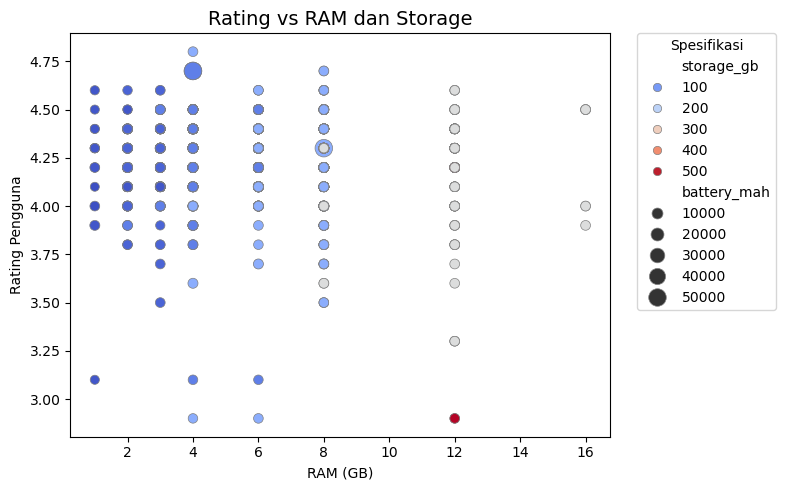

In [46]:
plt.figure(figsize=(8, 5))

# Scatter plot dengan hue = storage_gb, size = battery_mah
sns.scatterplot(
    data=df,
    x='ram_gb',
    y='ratings',
    hue='storage_gb',
    size='battery_mah',
    palette='coolwarm',
    sizes=(40, 160),
    edgecolor='gray',
    linewidth=0.5
)

plt.title('Rating vs RAM dan Storage', fontsize=14)
plt.xlabel('RAM (GB)')
plt.ylabel('Rating Pengguna')
plt.legend(title='Spesifikasi', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

Kesimpulan:
- Smartphone dengan RAM 4–8 GB dan storage 100–300 GB memberikan keseimbangan terbaik antara performa dan kepuasan pengguna.
- Storage yang terlalu besar (500 GB) belum tentu disukai pengguna, mungkin karena harga atau aspek lain yang tidak terlihat di grafik ini.
- Baterai besar tidak selalu berarti rating tinggi, artinya kepuasan pengguna lebih ditentukan oleh kombinasi fitur dan pengalaman menyeluruh, bukan hanya kapasitas daya.
- Visualisasi ini mendukung hipotesis bahwa pengguna cenderung puas dengan smartphone kelas menengah, baik dari sisi RAM maupun storage.

### Scatterplot Kamera VS Rating

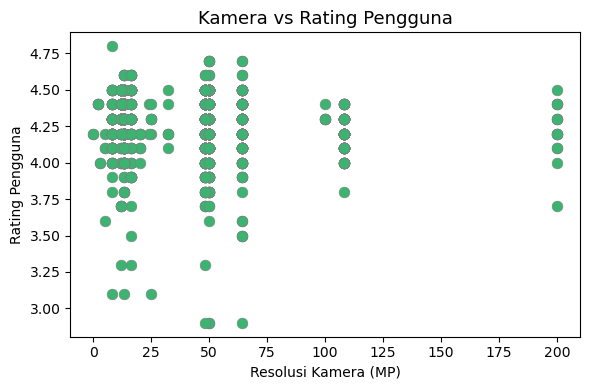

In [49]:
# Ekstraksi nilai kamera (MP) dari kolom 'camera'
data['camera_mp'] = data['camera'].str.extract(r'(\d+(?:\.\d+)?)').astype(float)

# Visualisasi hubungan antara kamera dan rating
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=data,
    x='camera_mp',
    y='ratings',
    color='mediumseagreen',
    s=60,
    edgecolor='gray',
    linewidth=0.4
)
plt.title('Kamera vs Rating Pengguna', fontsize=13)
plt.xlabel('Resolusi Kamera (MP)')
plt.ylabel('Rating Pengguna')
plt.tight_layout()
plt.show()

Kesimpulan:
- Mayoritas kamera utama smartphone berada di kisaran 12–64 MP, sesuai dengan standar industri.
- Kamera dengan resolusi ≥ 48 MP cenderung menerima rating ≥ 4.0, menandakan bahwa pengguna menghargai fitur ini.
- Namun, tidak terdapat korelasi linier: beberapa ponsel dengan kamera 108 MP atau bahkan 200 MP masih mendapat rating rendah (<4.0).
- Hal ini menunjukkan bahwa megapiksel bukan satu-satunya faktor penentu kualitas kamera di mata pengguna. Fitur pendukung seperti OIS (optical image stabilization), software pemrosesan gambar, AI enhancement, dan night mode turut menentukan kepuasan pengguna.

### Boxplot Rating Berdasarkan Generasi Jaringan

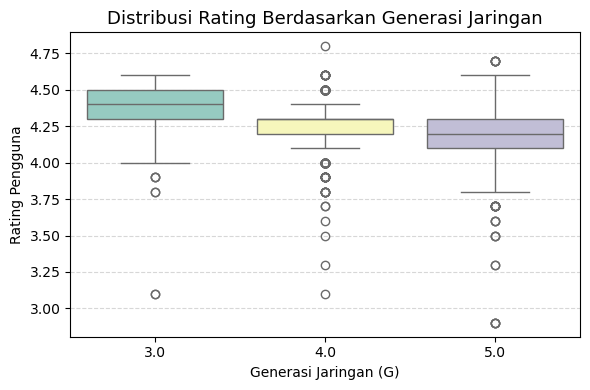

In [52]:
plt.figure(figsize=(6, 4))

# Boxplot rating berdasarkan generasi jaringan
sns.boxplot(
    data=df,
    x='network_gen',
    y='ratings',
    hue='network_gen',     # tambahkan ini
    palette='Set3',
    legend=False           # agar tidak menampilkan legend ganda
)

plt.title('Distribusi Rating Berdasarkan Generasi Jaringan', fontsize=13)
plt.xlabel('Generasi Jaringan (G)')
plt.ylabel('Rating Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Kesimpulan:
- Perangkat 3G memiliki median rating tertinggi (~4.4), meskipun teknologinya lebih tua.
- Rating perangkat 4G dan 5G justru sedikit lebih rendah, dengan median rating di kisaran 4.2–4.25, dan lebih banyak outlier rendah.
- Hal ini menunjukkan bahwa peningkatan generasi jaringan (3G → 5G) tidak selalu sejalan dengan peningkatan kepuasan pengguna.
- Faktor lain seperti kestabilan performa, efisiensi daya, harga, dan pengalaman keseluruhan kemungkinan lebih berperan dalam membentuk rating pengguna dibanding sekadar kemampuan jaringan.



### Korelasi Fitur Teknis dengan Rating Pengguna

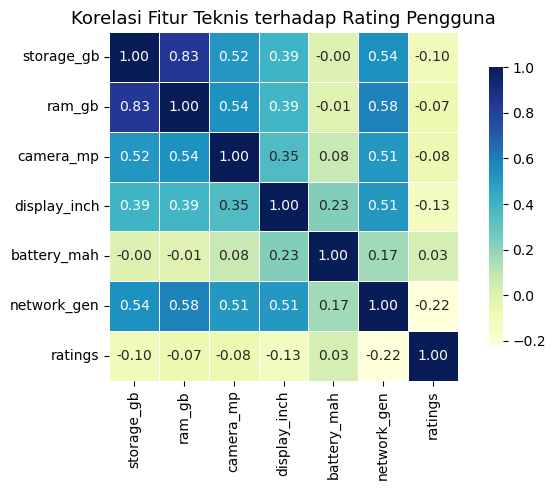

In [55]:
plt.figure(figsize=(7, 5))

# Hitung korelasi antar fitur teknis
correlation_matrix = df[['storage_gb', 'ram_gb', 'camera_mp', 'display_inch', 'battery_mah', 'network_gen', 'ratings']].corr()

# Heatmap korelasi
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title("Korelasi Fitur Teknis terhadap Rating Pengguna", fontsize=13)
plt.tight_layout()
plt.show()

Kesimpulan:
- Tidak ada fitur teknis yang memiliki korelasi kuat secara positif dengan rating pengguna.
- Korelasi tertinggi sekalipun (battery_mah: +0.03) sangat lemah dan hampir tidak berarti secara statistik.
- Fitur network_gen memiliki korelasi negatif cukup nyata (-0.22), yang sejalan dengan temuan sebelumnya bahwa perangkat 5G tidak selalu mendapat rating tinggi.
- Hal ini memperkuat argumen bahwa faktor-faktor non-teknis seperti harga, software, UX, brand loyalty, dan layanan purna jual kemungkinan lebih besar pengaruhnya terhadap rating pengguna daripada sekadar spesifikasi teknis.

### Heatmap Korelasi Fitur Teknis vs Rating per Segmen Harga

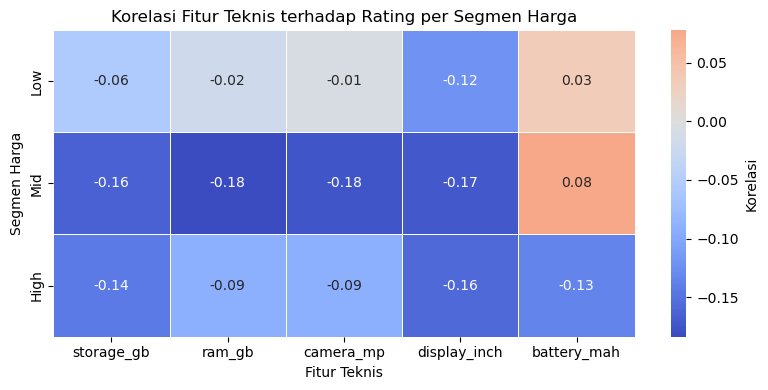

In [58]:
# 1. Hapus data dengan price kosong
df = df.dropna(subset=['price'])

# 2. Binning harga ke dalam tiga segmen: Low, Mid, High
try:
    df['price_segment'] = pd.qcut(df['price'], q=3, labels=['Low', 'Mid', 'High'])
except ValueError as e:
    print(f"Terjadi error saat binning harga: {e}")

# 3. Daftar fitur teknis yang akan dianalisis
features = ['storage_gb', 'ram_gb', 'camera_mp', 'display_inch', 'battery_mah']

# 4. Hitung korelasi antara fitur teknis dan rating, per segmen harga
correlation_dict = {}

for segment in ['Low', 'Mid', 'High']:
    segment_data = df[df['price_segment'] == segment]
    segment_data_clean = segment_data[features + ['ratings']].dropna()

    correlations = [
        segment_data_clean[feature].corr(segment_data_clean['ratings'])
        if segment_data_clean[feature].nunique() > 1 and segment_data_clean['ratings'].nunique() > 1
        else float('nan')
        for feature in features
    ]

    correlation_dict[segment] = correlations

# 5. Buat DataFrame korelasi (baris = segmen harga, kolom = fitur teknis)
correlation_df = pd.DataFrame(correlation_dict, index=features).T

# 6. Visualisasi heatmap korelasi per segmen harga
plt.figure(figsize=(8, 4))
sns.heatmap(
    correlation_df,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Korelasi'}
)
plt.xlabel('Fitur Teknis')
plt.ylabel('Segmen Harga')
plt.title('Korelasi Fitur Teknis terhadap Rating per Segmen Harga')
plt.tight_layout()
plt.show()

Kesimpulan:
- Tidak ada fitur teknis yang menunjukkan korelasi positif kuat terhadap rating pengguna di semua segmen harga.
- Segmen menengah (mid) justru menunjukkan korelasi negatif paling konsisten, mencerminkan tingginya harapan pengguna terhadap performa dan kualitas.
- Baterai (battery_mah) adalah satu-satunya fitur yang menunjukkan korelasi positif (meskipun lemah) di semua segmen, terutama di segmen mid (+0.08).
- Rating pengguna lebih banyak dipengaruhi oleh aspek non-teknis seperti stabilitas software, harga relatif, layanan purna jual, atau pengalaman penggunaan secara menyeluruh.



# **Modelling**

## **Content Based Filtering**

### A. Data Preparation

Untuk content-based filtering, kita akan fokus pada name,price,ratings dan corpus yang sudah disatukan untuk menjadi dasar pembuatan sistem rekomendasi tersebut. Oleh karena itu, dataframe hanya terdiri 4 kolom dari data yang dimiliki.

In [64]:
# 1. Pilih kolom yang relevan untuk analisis konten
dataset_content = data[['name', 'price', 'ratings', 'corpus']].copy()

# 2. Buat kolom gabungan brand_product sebagai representasi teks produk
dataset_content['brand_product'] = (
    dataset_content['name'].astype(str) +
    " | Rp" + dataset_content['price'].astype(int).astype(str) +
    " | Rating: " + dataset_content['ratings'].astype(str)
)

# 3. Tampilkan 5 data teratas
dataset_content.head()

,name,price,ratings,corpus,brand_product
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",23999.0,4.2,Storage128 GBRAM6 SystemAndroid 12Processor T...,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | Rp..."
1,"OPPO F11 Pro (Aurora Green, 128 GB)",20999.0,4.5,Storage128 GBRAM6 GBExpandable Storage256GB S...,"OPPO F11 Pro (Aurora Green, 128 GB) | Rp20999 ..."
2,"REDMI Note 11 (Starburst White, 64 GB)",13149.0,4.2,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,"REDMI Note 11 (Starburst White, 64 GB) | Rp131..."
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",21999.0,4.1,Storage256 GBRAM12 SystemAndroid Q 11Processo...,"OnePlus Nord CE 5G (Blue Void, 256 GB) | Rp219..."
6,"REDMI 10 Power (Sporty Orange, 128 GB)",18996.0,4.2,Storage128 GBRAM8 SystemAndroid 13Processor S...,"REDMI 10 Power (Sporty Orange, 128 GB) | Rp189..."


**Kesimpulan Preprocessing**

1. **Tujuan Utama**

   * Tujuan utama preprocessing adalah menyederhanakan dan menstrukturkan data agar dapat digunakan secara efektif dalam sistem rekomendasi berbasis konten (content-based filtering).

2. **Penyaringan Dataset**

   * Dataset awal telah difilter menjadi `dataset_content`, yang hanya menyimpan empat kolom penting:

     * `name` → Nama produk.
     * `price` → Harga produk.
     * `ratings` → Rating pengguna.
     * `corpus` → Informasi teknis seperti RAM, storage, OS, dan prosesor.

3. **Pembuatan Kolom Gabungan**

   * Dibuat kolom baru bernama `brand_product`, yang merupakan string gabungan dari:

     * Nama produk (`name`)
     * Harga produk (`price`)
     * Rating pengguna (`ratings`)
   * Contoh format hasil:

     ```yaml
     REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | Rp23999.0 | Rating: 4.2
     ```

4. **Fungsi Kolom `brand_product`**

   * Kolom `brand_product` digunakan sebagai representasi utama dalam sistem rekomendasi.
   * Sangat berguna saat dilakukan pemrosesan berbasis TF-IDF atau pencocokan kemiripan antar produk.
   * Memungkinkan sistem rekomendasi untuk menyajikan produk yang relevan secara teknis dan visual berdasarkan kemiripan fitur deskriptif (`corpus`).

In [66]:
# Mengonversi beberapa kolom dataset_content menjadi list
product_name   = dataset_content['name'].tolist()
price_list     = dataset_content['price'].tolist()
ratings_list   = dataset_content['ratings'].tolist()
corpus_list    = dataset_content['corpus'].tolist()
brand_product  = dataset_content['brand_product'].tolist()

# Menampilkan jumlah data dari masing-masing list
print(f"Terdapat {len(product_name)} data produk (name)")
print(f"Terdapat {len(price_list)} data harga (price)")
print(f"Terdapat {len(ratings_list)} data rating pengguna")
print(f"Terdapat {len(brand_product)} data representasi brand_product")
print(f"Terdapat {len(corpus_list)} data teks (corpus)")

Terdapat 1970 data produk (name)
Terdapat 1970 data harga (price)
Terdapat 1970 data rating pengguna
Terdapat 1970 data representasi brand_product
Terdapat 1970 data teks (corpus)


In [67]:
# Membuat DataFrame untuk content-based filtering
content_based_data = data[['name', 'price', 'ratings', 'corpus']].copy()

# Tambahkan kolom brand_product sebagai representasi gabungan untuk tampilan
content_based_data['brand_product'] = (
    content_based_data['name'].astype(str) +
    " | $" + content_based_data['price'].astype(str) +
    " | Rating: " + content_based_data['ratings'].astype(str)
)

# Tampilkan 5 baris pertama
content_based_data.head()

,name,price,ratings,corpus,brand_product
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",23999.0,4.2,Storage128 GBRAM6 SystemAndroid 12Processor T...,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $2..."
1,"OPPO F11 Pro (Aurora Green, 128 GB)",20999.0,4.5,Storage128 GBRAM6 GBExpandable Storage256GB S...,"OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0..."
2,"REDMI Note 11 (Starburst White, 64 GB)",13149.0,4.2,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,"REDMI Note 11 (Starburst White, 64 GB) | $1314..."
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",21999.0,4.1,Storage256 GBRAM12 SystemAndroid Q 11Processo...,"OnePlus Nord CE 5G (Blue Void, 256 GB) | $2199..."
6,"REDMI 10 Power (Sporty Orange, 128 GB)",18996.0,4.2,Storage128 GBRAM8 SystemAndroid 13Processor S...,"REDMI 10 Power (Sporty Orange, 128 GB) | $1899..."


**Kesimpulan Proses: Persiapan Data untuk Content-Based Filtering**

1. **Pemilihan Kolom Penting**

   * Dari DataFrame `data`, hanya kolom-kolom yang relevan untuk sistem rekomendasi yang disimpan:

     * `name` → Nama produk
     * `price` → Harga produk
     * `ratings` → Penilaian pengguna
     * `corpus` → Deskripsi teks gabungan (informasi teknis)

2. **Pembuatan Kolom Gabungan (Representasi Produk)**

   * Dibuat kolom baru bernama `brand_product` yang menggabungkan:

     * Nama produk (`name`)
     * Harga produk (`price`)
     * Rating pengguna (`ratings`)
   * Kolom ini digunakan sebagai representasi teks final dalam proses content-based filtering, misalnya untuk transformasi ke dalam vektor TF-IDF.

3. **Konversi ke List untuk Proses Selanjutnya**

   * Setiap kolom penting dikonversi ke dalam bentuk list:

     * `product_name`, `price_list`, `ratings_list`, `corpus_list`, dan `brand_product`
   * Hal ini memudahkan manipulasi data dan pencocokan (matching) di luar DataFrame, seperti saat menggunakan cosine similarity atau perulangan manual.

4. **Validasi Panjang Data**

   * Dicetak jumlah elemen dari masing-masing list untuk memastikan bahwa semua struktur data memiliki panjang yang sama dan siap digunakan.


In [69]:
# 1. Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# 2. Melatih TF-IDF pada kolom brand_product
tfidf_vectorizer.fit(content_based_data['brand_product'])

# 3. Mendapatkan daftar nama fitur (kata-kata unik)
feature_names = tfidf_vectorizer.get_feature_names_out()

# 4. Tampilkan daftar fitur (jika perlu, misalnya print(feature_names[:10]) untuk sebagian)
feature_names

array(['10', '10000', '10190', ..., 'z1x', 'z2', 'zero'], dtype=object)

In [70]:
# 1. Inisialisasi dan transformasi TF-IDF matrix dari kolom brand_product
tfidf_matrix = tfidf_vectorizer.fit_transform(content_based_data['brand_product'])

# 2. Tampilkan ukuran matrix (jumlah dokumen × jumlah fitur)
tfidf_matrix.shape

(1970, 1404)

In [71]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Kesimpulan:
- Hasil dari `TfidfVectorizer.fit_transform()` adalah **sparse matrix**, yaitu struktur data efisien yang hanya menyimpan nilai-nilai non-nol.
- Dengan `.todense()`, kita mengubahnya menjadi **matrix penuh (dense)** yang berisi semua nilai, termasuk nol.

In [73]:
# Membentuk DataFrame TF-IDF: baris = brand_product, kolom = fitur (kata)
tfidf_df = pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf_vectorizer.get_feature_names_out(),
    index=content_based_data['brand_product']
)

# Menampilkan tabel (opsional)
tfidf_df.head()


,10,10000,10190,10280,10300,10390,10397,10449,10470,10490,...,y91,y91i,y93,y95,yellow,youth,z1pro,z1x,z2,zero
brand_product,,,,,,,,,,,,,,,,,,,,,
"REDMI Note 12 Pro 5G (Onyx Black, 128 GB) | $23999.0 | Rating: 4.2",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"OPPO F11 Pro (Aurora Green, 128 GB) | $20999.0 | Rating: 4.5",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"REDMI Note 11 (Starburst White, 64 GB) | $13149.0 | Rating: 4.2",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"OnePlus Nord CE 5G (Blue Void, 256 GB) | $21999.0 | Rating: 4.1",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"REDMI 10 Power (Sporty Orange, 128 GB) | $18996.0 | Rating: 4.2",0.294548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kesimpulan:
- Kode ini membentuk sebuah DataFrame dari matriks TF-IDF, di mana setiap baris mewakili satu produk (berdasarkan kolom brand_product), dan setiap kolom mewakili kata unik (fitur) yang muncul dalam representasi teks produk. Nilai dalam DataFrame menunjukkan bobot TF-IDF dari setiap kata terhadap masing-masing produk, mencerminkan seberapa penting kata tersebut dalam konteks deskripsi produk tersebut.
- DataFrame ini dapat digunakan sebagai dasar untuk menghitung kemiripan antar produk, sehingga menjadi komponen penting dalam implementasi sistem rekomendasi berbasis konten (content-based filtering) — khususnya dalam menilai kesamaan antar smartphone berdasarkan nama, harga, dan rating.

## B. Model and Result

Untuk menentukan content-based filtering, pada proyek ini digunakan cosine similarity untuk mencari kemiripan produk dan brand.

In [77]:
# 1. Menghitung cosine similarity dari matriks TF-IDF
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# 2. Menampilkan hasil similarity (opsional, misalnya hanya sebagian)
cosine_sim_matrix


array([[1.        , 0.11319269, 0.14134825, ..., 0.12855279, 0.08490887,
        0.08338002],
       [0.11319269, 1.        , 0.01315194, ..., 0.04149697, 0.0128794 ,
        0.26329254],
       [0.14134825, 0.01315194, 1.        , ..., 0.01354117, 0.01130188,
        0.01319146],
       ...,
       [0.12855279, 0.04149697, 0.01354117, ..., 1.        , 0.08496123,
        0.08343144],
       [0.08490887, 0.0128794 , 0.01130188, ..., 0.08496123, 1.        ,
        0.04781386],
       [0.08338002, 0.26329254, 0.01319146, ..., 0.08343144, 0.04781386,
        1.        ]])

Kesimpulan:

Kode ini menggunakan cosine_similarity dari sklearn.metrics.pairwise untuk menghitung kemiripan antar produk berdasarkan representasi teks mereka dalam bentuk TF-IDF. Hasilnya adalah sebuah matriks dua dimensi (cosine_sim_matrix) di mana setiap nilai menunjukkan tingkat kemiripan antara dua produk:
* Nilai 1.0 berarti kedua produk memiliki representasi teks yang identik,
* Nilai mendekati 0 berarti sangat tidak mirip.
  
Matriks ini menjadi inti dari sistem rekomendasi berbasis konten (content-based filtering), karena memungkinkan pemodelan hubungan antar produk berdasarkan deskripsi, nama, harga, dan rating yang telah digabung dan diubah menjadi fitur teks.

In [79]:
# Membentuk kembali kolom brand_product sebagai representasi produk
dataset_content['brand_product'] = (
    data['name'].astype(str) +
    " | $" + data['price'].astype(str) +
    " | Rating: " + data['ratings'].astype(str)
)

# Membuat DataFrame cosine similarity: baris & kolom = nama produk
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=dataset_content['brand_product'],
    columns=dataset_content['brand_product']
)

# Menampilkan ukuran matrix
print(f"Shape: {cosine_sim_df.shape}")

# Menampilkan sebagian isi matrix similarity (15 baris × 5 kolom)
cosine_sim_df.sample(n=15, axis=0).sample(n=5, axis=1)

Shape: (1970, 1970)


brand_product,"vivo Y22 (Metaverse Green, 64 GB) | $14499.0 | Rating: 4.3","SAMSUNG A04 e (Copper, 64 GB) | $9999.0 | Rating: 4.1","vivo T2x 5G (Marine Blue, 128 GB) | $12999.0 | Rating: 4.4","vivo Y75 5G (Glowing Galaxy, 128 GB) | $21990.0 | Rating: 4.4","vivo V25 5G (Surfing Blue, 128 GB) | $25990.0 | Rating: 4.3"
brand_product,,,,,
"OPPO A3s (Purple, 16 GB) | $8990.0 | Rating: 4.3",0.013524,0.015265,0.014296,0.013593,0.012786
"Infinix HOT 20 5G (Racing Black, 64 GB) | $11499.0 | Rating: 4.2",0.047161,0.053233,0.051223,0.048707,0.045814
"SAMSUNG Galaxy F41 (Fusion Blue, 64 GB) | $15999.0 | Rating: 4.3",0.051293,0.111585,0.058916,0.063341,0.052695
"REDMI Note 11S (Horizon Blue, 128 GB) | $15485.0 | Rating: 4.1",0.012606,0.014229,0.074666,0.034073,0.066782
"vivo V27 5G (Noble Black, 256 GB) | $28537.0 | Rating: 4.4",0.070543,0.014420,0.111047,0.105594,0.099323
"Infinix Hot 11S (Green Wave, 128 GB) | $11999.0 | Rating: 4.3",0.092422,0.015117,0.038071,0.036202,0.034052
"vivo Y20T (Purist Blue, 64 GB) | $14990.0 | Rating: 4.3",0.102273,0.051187,0.112260,0.069871,0.100407
"OPPO A7 (Glaze Blue, 64 GB) | $18990.0 | Rating: 4.4",0.047474,0.053585,0.054528,0.013247,0.048771
"Infinix Note 12 (Force Black, 128 GB) | $12999.0 | Rating: 4.2",0.014534,0.016405,0.235348,0.039286,0.036952


Kesimpulan:

Kode ini membentuk sebuah DataFrame dari matriks cosine similarity, dengan baris dan kolom yang mewakili masing-masing produk melalui representasi teks brand_product (gabungan nama, harga, dan rating).

Setiap nilai dalam cosine_sim_df menunjukkan tingkat kemiripan antara dua produk berdasarkan konten teksnya. Nilai mendekati 1 berarti sangat mirip, sedangkan nilai mendekati 0 menunjukkan ketidaksamaan.

Dengan struktur ini, sistem dapat:

* Menelusuri produk serupa dengan cepat,
* Mengidentifikasi pasangan produk yang paling mirip,
* Menjadi dasar dalam penerapan sistem rekomendasi berbasis konten (content-based filtering), di mana rekomendasi diberikan berdasarkan produk yang memiliki deskripsi paling mirip dengan produk yang sedang dilihat pengguna.

## C. Testing System Recommendation

In [82]:
def smart_content_based_recommendation(phone_query, similarity_data=cosine_sim_df,
                                       items=content_based_data, k=10):
    # Cek apakah query cocok persis
    if phone_query in similarity_data.columns:
        selected_name = phone_query
    else:
        # Cari berdasarkan substring
        matched_names = [col for col in similarity_data.columns if phone_query.lower() in col.lower()]
        if not matched_names:
            raise ValueError(f"Tidak ada produk cocok dengan '{phone_query}'.")
        selected_name = matched_names[0]
        print(f"Menggunakan produk terdekat: {selected_name}")

    index = similarity_data.loc[:, selected_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1: -(k + 2): -1].flatten()]
    closest = closest.drop(selected_name, errors="ignore")

    # Ganti 'name' ke 'brand_product' karena similarity pakai itu
    closest_df = pd.DataFrame({'brand_product': closest})

    # Merge dengan kolom brand_product, bukan name
    result = closest_df.merge(items, on="brand_product").head(k)

    if result.empty:
        raise ValueError("Rekomendasi tidak ditemukan.")
    
    return result

def recommend_by_partial_name(partial_name, similarity_data=cosine_sim_df,
                               items=content_based_data, k=10):
    # Cari nama produk yang cocok sebagian
    matched_names = [col for col in similarity_data.columns if partial_name.lower() in col.lower()]
    
    if not matched_names:
        raise ValueError(f"Tidak ada produk cocok dengan '{partial_name}'.")

    # Ambil nama pertama yang cocok
    selected_name = matched_names[0]

    print(f"Menggunakan produk: {selected_name}")
    closest_df = pd.DataFrame({'name': closest})
    return closest_df.merge(items, on="name").head(k)



Penjelasan:

Kode ini bertujuan untuk menguji sistem rekomendasi berbasis konten (content-based recommendation system) untuk produk handphone.

In [85]:
# Menampilkan baris sesuai dengan nama brand_product
content_based_data[content_based_data.brand_product.eq('SAMSUNG Galaxy M04 (Light Green, 64 GB) | $8185.0 | Rating: 4.1')]


,name,price,ratings,corpus,brand_product
713,"SAMSUNG Galaxy M04 (Light Green, 64 GB)",8185.0,4.1,Storage64 GBRAM4 SystemAndroid 12Processor Ty...,"SAMSUNG Galaxy M04 (Light Green, 64 GB) | $818..."


Dari hasil diatas menunjukan bahwa code berhasilkan menampilkan baris sesuai dengan nama brand_product yang diuji coba.

In [87]:
smart_content_based_recommendation("SAMSUNG Galaxy")

Menggunakan produk terdekat: SAMSUNG Galaxy A04 (Green, 128 GB) | $12999.0 | Rating: 4.0


,brand_product,name,price,ratings,corpus
0,"SAMSUNG Galaxy A04 (Black, 128 GB) | $11990.0 ...","SAMSUNG Galaxy A04 (Black, 128 GB)",11990.0,4.0,Storage128 GBRAM4 GBTotal Memory128GB SystemA...
1,"SAMSUNG Galaxy A04 (Copper, 128 GB) | $12799.0...","SAMSUNG Galaxy A04 (Copper, 128 GB)",12799.0,4.0,Storage128 GBRAM4 GBTotal Memory128GB SystemA...
2,"SAMSUNG A04 e (Copper, 64 GB) | $9999.0 | Rati...","SAMSUNG A04 e (Copper, 64 GB)",9999.0,4.1,"Storage64 GBRAM3 SystemAndroid Q Android 12, ..."
3,"SAMSUNG Galaxy A04 (Copper, 64 GB) | $11199.0 ...","SAMSUNG Galaxy A04 (Copper, 64 GB)",11199.0,4.4,Storage64 GBRAM4 GBTotal Memory64GB SystemAnd...
4,"SAMSUNG Galaxy A12 (Black, 64 GB) | $12999.0 |...","SAMSUNG Galaxy A12 (Black, 64 GB)",12999.0,4.3,Storage64 GBRAM4 GBExpandable Storage1TB Syst...
5,"SAMSUNG Galaxy M11 (Black, 32 GB) | $12999.0 |...","SAMSUNG Galaxy M11 (Black, 32 GB)",12999.0,4.3,Storage32 GBRAM3 GBExpandable Storage512GB Sy...
6,"SAMSUNG Galaxy M11 (Violet, 64 GB) | $12999.0 ...","SAMSUNG Galaxy M11 (Violet, 64 GB)",12999.0,4.4,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
7,"SAMSUNG Galaxy M11 (Violet, 64 GB) | $12999.0 ...","SAMSUNG Galaxy M11 (Violet, 64 GB)",12999.0,4.4,Storage32 GBRAM2 GBExpandable Storage512GB Sy...
8,"SAMSUNG Galaxy M11 (Violet, 64 GB) | $12999.0 ...","SAMSUNG Galaxy M11 (Violet, 64 GB)",12999.0,4.4,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
9,"SAMSUNG Galaxy M11 (Violet, 64 GB) | $12999.0 ...","SAMSUNG Galaxy M11 (Violet, 64 GB)",12999.0,4.4,Storage32 GBRAM2 GBExpandable Storage512GB Sy...


Penjelasan:

Dari hasil rekomendasi berdasarkan name, price, ratings, dan corpus berhasil memberikan rekomendasi sesuai sebanyak 9 rekomendasi dan tidak sesuai 1 rekomendasi.